In [1]:
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn

In [2]:
#uploading the data with header
# data :https://archive.ics.uci.edu/ml/machine-learning-databases/adult/
data=pd.read_csv('adult.data')
data.dropna()
data.replace('?',-9999,inplace=True)
data.head()

,age,workingclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital gain,capital loss,hourse-per-work,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
#Hot encoding
data_dum=pd.get_dummies(data)
data_dum.head()

,age,fnlwgt,education-num,capital gain,capital loss,hourse-per-work,workingclass_ ?,workingclass_ Federal-gov,workingclass_ Local-gov,workingclass_ Never-worked,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
X=np.array(data_dum.drop(["income_ <=50K","income_ >50K"],1))
Y=np.array(data_dum["income_ >50K"])

In [5]:
#Test train split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42)

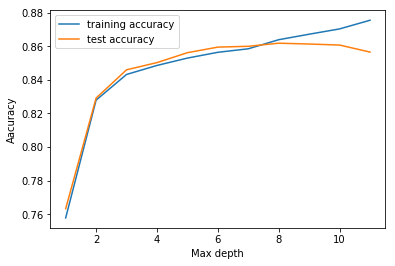

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
i=range(1,12)
training_accuracy=[]
test_accuracy=[]
for a in i:
    DTR=DecisionTreeClassifier(max_depth=a,random_state=0)
    DTR.fit(X_train,Y_train)
    training_accuracy.append(DTR.score(X_train,Y_train))
    test_accuracy.append(DTR.score(X_test,Y_test))
plt.plot(i,training_accuracy,label="training accuracy")
plt.plot(i,test_accuracy,label="test accuracy")
plt.ylabel("Aacuracy")
plt.xlabel("Max depth")
plt.legend()
plt.show()

From the graph we can clearly see that for best performance max depth =7

In [7]:
#Visualizing the decision tree
DTR=DecisionTreeClassifier(max_depth=7,random_state=0)
DTR.fit(X_train,Y_train)
data_dum_1=data_dum.drop(["income_ <=50K","income_ >50K"],1)
from sklearn.tree import export_graphviz
export_graphviz(DTR,out_file="tree.dot",class_names=["Less then 50K","More then 50K"],feature_names=data_dum_1.columns.values,
                impurity=False,filled=True)

In [8]:
!dot -Tpng tree.dot -o tree.png -Gdpi=600

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.398543 to fit


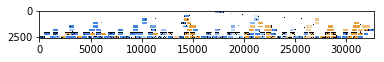

In [9]:
import cv2
img = cv2.imread('tree.png')
img_single_channel = cv2.imread('tree.png', 0)
cv2.imshow('OpenCV imshow()', img)
plt.imshow(img, cmap='gray')
plt.show()

In [10]:
#Feature importance 
print("Feature importance:\n{}".format(DTR.feature_importances_))

Feature importance:
[4.45916655e-02 4.45146987e-03 2.22340711e-01 1.99923483e-01
 6.81781148e-02 1.87586874e-02 0.00000000e+00 4.74247740e-05
 7.91454482e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.26862445e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.32343482e-04
 0.00000000e+00 0.00000000e+00 4.42831892e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.41838042e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.28338681e-01 0.00000000e+00 0.00000000e+00
 7.13799472e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.69738304e-03 1.18287044e-04
 4.62400485e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.37426333e-04 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.36383690e-04 3.08911782e-04 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.32687647e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.9

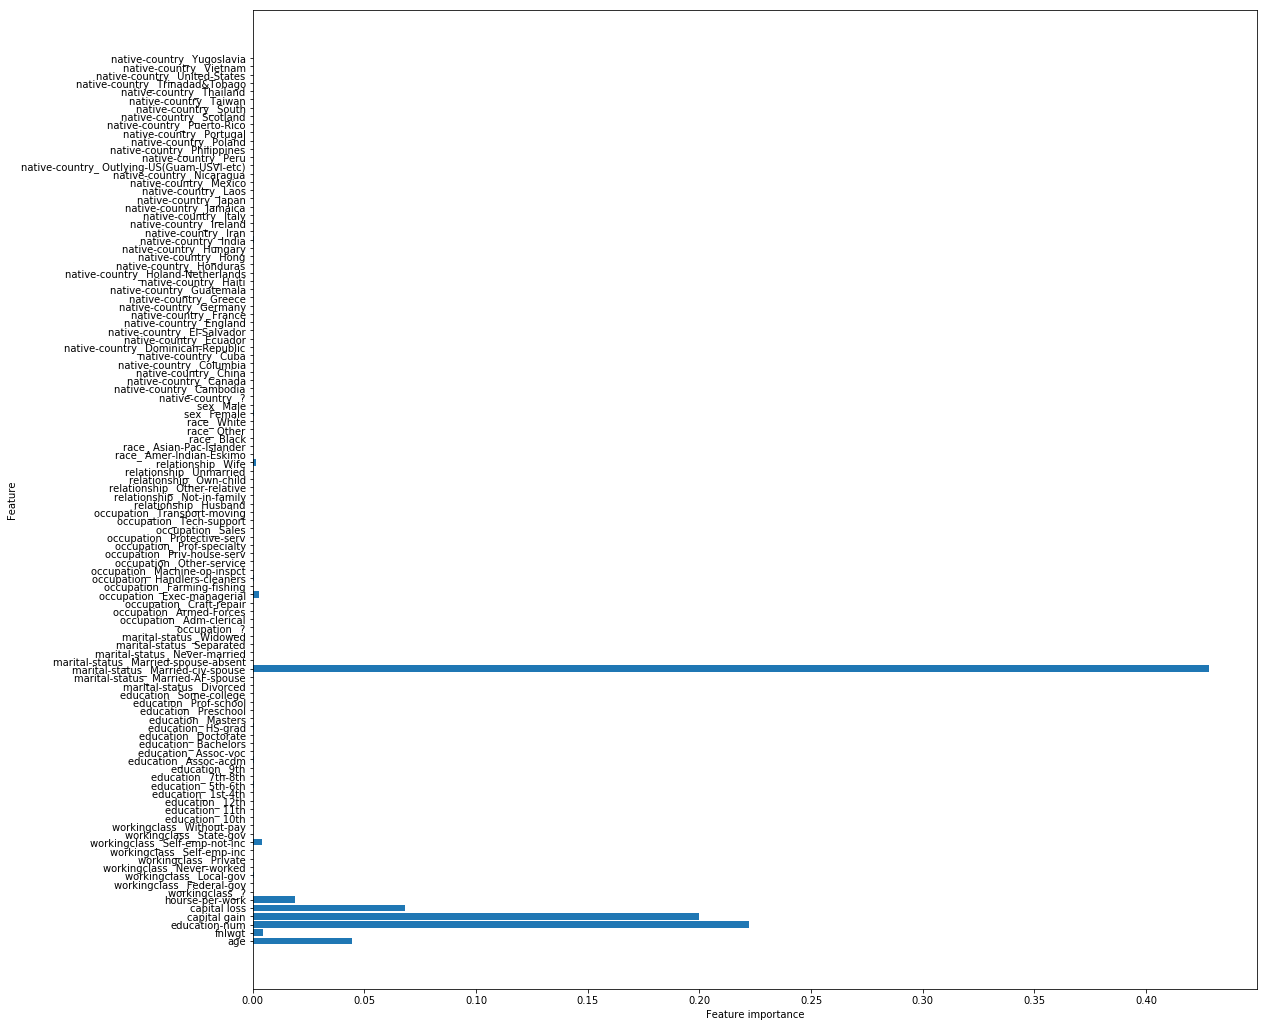

In [11]:
#plot feature importance
#controlling plot size
matplotlib.rcParams['figure.figsize'] = [18,18]
n_features=data_dum_1.shape[1]
plt.barh(range(n_features),DTR.feature_importances_,align='center')
plt.yticks(np.arange(n_features),data_dum_1.columns.values)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()